# __Google Data Analytics Case Study__
## __Cyclistic Bike-Share Analysis__
### _How Does a Bike-Share Navigate Speedy Success?_

## __About the Company__
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.


## __Key Stakeholder__
#### __Lily Moreno:__ _The director of marketing and your manager. Moreno is responsible for the development of campaigns and_
#### _initiatives to promote the bike-share program. These may include email, social media, and other channels_

## __Scenario__
    You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# __Part 1:__ _ASK_
#### There are __3 major questions__ that are aimed at guiding the future of the marketing team:
    1. How do annual members and casual riders use Cyclistic bikes differently?
    2. Why would casual riders buy Cyclistic annual memberships?
    3. How can Cyclistic use digital media to influence casual riders to become members?
### We have been assigned to help answer __question number 1__ for Lily Moreno.
#### __Our report will consist of:__
    1. A clear statement of the business task
    2. A description of all data sources used
    3. Documentation of any cleaning or manipulation of data
    4. A summary of your analysis
    5. Supporting visualizations and key findings_
    6. Top three recommendations based on your analysis

### __Business Task__
    Lily Moreno wants me to help assist in answering how member riders and casual riders use the bike-share system differently. In order to acheive this, we will look at historical bike-share data collected via the company to analyze for patterns and trends between the two user type groups. This data will need to be reviewed and cleaned before the analysis can take place. Through the analysis, we will be able to see the difference in system usage between the two user types, and use that analysis to generate constructive recommendations that can be best understood through visualization of the data. Lily Moreno is the director of marketing, which allows a direct route for the recommendations to be acknowledged and accomidated for future development of campaigns that aim towards enticing casual riders to become members of the Cyclistic bike-share program.

# __Part 2:__ _Prepare_

### __Key Tasks:__
    1. Download data and store it appropriately
    2. Identify how it’s organized.
    3. Sort and filter the data.
    4. Determine the credibility of the data.


In [1]:
import pandas as pd #For data manipulation
import numpy as np #For mathematical calculations
import datetime as dt #For working with dates and times
import seaborn as sns #For creating visualizations
import matplotlib.pyplot as plt #For creating visualizations
import plotly.express as ex #For creating visualizations

In [2]:
#Importing the datasets with the pandas .read_csv() method.

jan2022 = pd.read_csv("/kaggle/input/2022-divvy-tripdata/202201-divvy-tripdata.csv")
feb2022 = pd.read_csv("/kaggle/input/2022-divvy-tripdata/202202-divvy-tripdata.csv")
mar2022 = pd.read_csv("/kaggle/input/2022-divvy-tripdata/202203-divvy-tripdata.csv")
apr2022 = pd.read_csv("/kaggle/input/2022-divvy-tripdata/202204-divvy-tripdata.csv")
may2022 = pd.read_csv("/kaggle/input/2022-divvy-tripdata/202205-divvy-tripdata.csv")
jun2022 = pd.read_csv("/kaggle/input/2022-divvy-tripdata/202206-divvy-tripdata.csv")
jul2022 = pd.read_csv("/kaggle/input/2022-divvy-tripdata/202207-divvy-tripdata.csv")
aug2022 = pd.read_csv("/kaggle/input/2022-divvy-tripdata/202208-divvy-tripdata.csv")
sep2022 = pd.read_csv("/kaggle/input/2022-divvy-tripdata/202209-divvy-publictripdata.csv")
oct2022 = pd.read_csv("/kaggle/input/2022-divvy-tripdata/202210-divvy-tripdata.csv")
nov2022 = pd.read_csv("/kaggle/input/2022-divvy-tripdata/202211-divvy-tripdata.csv")
dec2022 = pd.read_csv("/kaggle/input/2022-divvy-tripdata/202212-divvy-tripdata.csv")

In [3]:
# Joining the datasets into a single dataset with the pandas .concat() method.

year2022_unclean = pd.concat([jan2022, feb2022, mar2022, apr2022, may2022, jun2022, jul2022, 
                              aug2022, sep2022, oct2022, nov2022, dec2022])
# Getting a preview of the dataset

year2022_unclean.info()
year2022_unclean.head()

# We can see that all data types are listed as objects, with the exception of the latitude and longitude columns.

<class 'pandas.core.frame.DataFrame'>
Index: 5667717 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 605.4+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


### __Guiding Questions:__
    1. Where is your data located?
    - The data is located in a large folder on the Amazon Web Services and is provided by Lyft and Divvy. Each dataset for the 2022 year is broken up by month of the year and are saved as CSV files.
    
    2. How is the data organized?
    - The data is organized into 12 CSV files based on each month of the 2022 year. Each dataset consists of columns named: ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_long, end_lat, end_long, and member_casual. These columns provide information regarding the locations of all bike rides (beginning and end), the id assigned to the user, the user type (member or casual), and the type of bike used for transport.        
    3. Are there issues with bias or credibility in this data?
    - This data is collected directly via the company and come from trackers installed within each bike. In a general overview of the data, there seems to be no areas that would be able to have bias included within. As this data is product data, the company uses the data internally to analyze the use of their products to gain insights towards developing future approaches to their products.
    
    4. How are you addressing licensing, privacy, security, and accessibility?
    - The licensing for this data is provided via the Google Data Analytics Case Study 1 project guide. The data is owned by Lyft Bikes and Scooters, LLC, as the Cyclistic company is a fictional company being used for this project. The link for the data license can be found below.
    
    5. How did you verify the data’s integrity?
    - The data's integrity is verified through the source in which it is collected. As each bike has a tracker attached to the frame that collects data as the bike is used, this data is immediately available and directly input into the database without the needs of user input. This data is strictly observational based on the activation of the tracker when a bike is unlocked for use.    
    6. How does it help you answer your question?
    - The data contains plenty of useful information that can help us compare and contrast the uses of bikes via each user type. There is a column dedicated to identifying the user type of the individual who uses a bike, which allows us to make direct comparisons of how each user type uses the system. Through the use of the member_casual column, we can create our own columns that calculate different components for comparison, such as number of rides by day, weekday, and month, or by ride lengths per category by using the started_at and ended_at columns to produce a ride time for each record. These can be easily reviewed and visualized to get a good view on how members and causal riders use the bikes in different ways.
    
    7. Are there any problems with the data?
    - After checking for missing, not a number, and null results in each column, it was found that there were zero missing values in all columns of the dataset. This helps confirm the data integrity, as all columns have a value for each record. We also insured that the ride_id column did not contain any duplicate values. This is important because it ensures that each record is a unique entry and is being recorded in the database properly. On the other hand, there are some changes to the data that can be made to set up our analysis. We can use the started_at and ended_at columns to extract a ride time and a date (including the day name, day number, and month name) that allows us to analyze how each user type differs in ride time, daily use, weekly use, and monthly use.        
__[Data Liscense Link](https://divvybikes.com/data-license-agreement)__

# __Part 3:__ _Process_

### __Key Tasks:__
    1. Check the data for errors.
    2. Choose your tools.
    3. Transform the data so you can work with it effectively.
    4. Document the cleaning process.

In [4]:
# Removing unwanted columns with the .drop() method

year2022_unclean = year2022_unclean.drop(columns = ["start_station_name", "start_station_id", "end_station_name", 
                                                    "end_station_id", "start_lat", "start_lng", "end_lat",
                                                    "end_lng"])

year2022_unclean.head()

#Now we only have the columns that are applicable to our analysis

,ride_id,rideable_type,started_at,ended_at,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,member


In [5]:
# Chaning column names to variations that are easier to use via the .rename() method.

year2022_unclean.rename(columns = {"rideable_type":"bike_type", "started_at":"ride_start",
                                  "ended_at":"ride_end", "member_casual":"user_type"}, inplace=True)
year2022_unclean.head()

,ride_id,bike_type,ride_start,ride_end,user_type
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,member


In [6]:
#Checking for blank/Not a Number/ Null values via the .isna() method in tandem with the .sum() method.

year2022_unclean.isna().sum()

ride_id       0
bike_type     0
ride_start    0
ride_end      0
user_type     0
dtype: int64

In [7]:
# Checking for duplicate ride_id values with the .duplicated() and .sum() methods. Each ride_id should be unique.

year2022_unclean["ride_id"].duplicated().sum()

0

In [8]:
#Changing the data types of the ride_start and ride_end columns to datetime64[ns] with the .astype() method.

year2022_unclean["ride_start"] = year2022_unclean["ride_start"].astype("datetime64[ns]")
year2022_unclean["ride_end"] = year2022_unclean["ride_end"].astype("datetime64[ns]")

year2022_unclean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5667717 entries, 0 to 181805
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ride_id     object        
 1   bike_type   object        
 2   ride_start  datetime64[ns]
 3   ride_end    datetime64[ns]
 4   user_type   object        
dtypes: datetime64[ns](2), object(3)
memory usage: 259.4+ MB


In [9]:
# Creating a new column called ride_time in minutes by subtracting the ride_end time from the ride_start time with the pandas .Timedelta() method.

year2022_unclean["ride_time"] = (year2022_unclean["ride_end"] - year2022_unclean["ride_start"]) / (pd.Timedelta(minutes = 1))

# I need to change the datatype to int32 for analysis purposes.

year2022_unclean["ride_time"] = year2022_unclean["ride_time"].astype("int32")
year2022_unclean.head()

,ride_id,bike_type,ride_start,ride_end,user_type,ride_time
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual,2
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual,4
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,member,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,casual,14
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,member,6


In [10]:
# Now I need to check for any negative values that might have occurred through the command above.

year2022_unclean[year2022_unclean["ride_time"] < 0].count()

ride_id       74
bike_type     74
ride_start    74
ride_end      74
user_type     74
ride_time     74
dtype: int64

In [11]:
# There are 74 records out of 181805, so removing them should not cause any skews in the data. I will remove them by
# setting the column equal to values greater than zero, using the .reset_index() method to use the default index. I will 
# drop the new index column to keep the data frame in its original form.

year2022_unclean = year2022_unclean[year2022_unclean["ride_time"] > 0]
year2022_unclean = year2022_unclean.reset_index()
year2022_unclean = year2022_unclean.drop(columns = ["index"])
year2022_unclean[year2022_unclean["ride_time"] < 0].count()

ride_id       0
bike_type     0
ride_start    0
ride_end      0
user_type     0
ride_time     0
dtype: int64

In [12]:
# Now that we have dealt with the negative values, I will splice the ride_start column into month_day, weekday, month, and year columns
# with the datetime .day, .day_name(), .month_name(), and .year methods, respectively.

year2022_unclean["month_day"] = year2022_unclean["ride_start"].dt.day
year2022_unclean["weekday"] = year2022_unclean["ride_start"].dt.day_name()
year2022_unclean["month"] = year2022_unclean["ride_start"].dt.month_name()
year2022_unclean["year"] = year2022_unclean["ride_start"].dt.year

year2022_unclean.head()

,ride_id,bike_type,ride_start,ride_end,user_type,ride_time,month_day,weekday,month,year
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual,2,13,Thursday,January,2022
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual,4,10,Monday,January,2022
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,member,4,25,Tuesday,January,2022
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,casual,14,4,Tuesday,January,2022
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,member,6,20,Thursday,January,2022


In [13]:
# We are finished manipulating the data, so we will run the initial checks on the data frame, with an
# additional check for unique values in each column with the .nunique() method.

year2022_unclean.isna().sum()

ride_id       0
bike_type     0
ride_start    0
ride_end      0
user_type     0
ride_time     0
month_day     0
weekday       0
month         0
year          0
dtype: int64

In [14]:
year2022_unclean["ride_id"].duplicated().sum()

0

In [15]:
year2022_unclean.nunique()

ride_id       5546628
bike_type           3
ride_start    4660581
ride_end      4672942
user_type           2
ride_time        2814
month_day          31
weekday             7
month              12
year                1
dtype: int64

In [16]:
# To finsih the processing step, I will save the clean dataset as a new CSV file for easier use and any accidental mistakes to the data.

year2022_unclean.to_csv("clean_year2022.csv")

### __Guiding Questions__
    1. What tools are you choosing and why?
        - For this data analysis, I am choosing to use Python and its associated libraries (plotly, numpy, seaborn, matplotlib, datetime, and pandas). I chose to use Python due to its accessibility to manipulate and analyze large datasets. Since the entire years’ worth of data will be formulated into a single entity, Python will work well with the size of the dataset. Python also allows for easy data manipulation, calculation, and visualization, thus making it a "one-stop shop" for all my needs for this analysis.
        
    2. Have you ensured your data's integrity?
        - The data's integrity has been shown through its collection and pre-viewing. The data contains no null, not a number, or blank values within the dataset, along with no duplicate values within the ride_id column. The data is from a first-hand source, and is directly taken from collection into a database without the need of input from users.
        
    3. What steps have you taken to ensure your data is clean?
        - For this dataset, I started by checking for null, not a number, and blank values within the combined dataset. This result showed none of these values, ensuring that each column contained a value for each record. I then checked for duplicate values within the ride_id column and found no duplicates within the column. This shows that each record in the dataset is unique. At this point, I chose to drop the columns that I deemed unneccesary for my analysis (start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng). From here, I needed to create new columns for ride time, weekday, day of month, month, and year. To do this, I started by changing the value type of the started_at and ended_at columns from objects to datetime64[ns]. This allows me to use the datetime library to manipulate these columns to create colums for ride time, weekday, day of month, month, and year. First, I use the pandas timedelta function in conjunction with subtracting the ended_at column time from the started_at column time. I then transferred the datavalue from datetime64[ns] to int32 and created the column ride_time. Next, I checked to ensure that all values from this calculation greater than zero. I found that 74 records had a negative value for ride_time. I chose to drop those records by setting the dataset equal to all ride_time records that were greater than zero, and I reset and dropped the index column. After this, I checked for any values less than zero and the result was zero columns in the dataset with negative values. I then created a day_num, day_of_week, month, and year columns by using the dt.day, dt.day_name, dt.month_name, and dt.year on the started_at column to return values for each record in the dataset. I confirmed the code worked correctly by looking at a head of the dataset and ensuring that the values were correct. From here, I ensured that each column in my dataset had the correct amount of unique values, specifically the rideable_type, member_casual, day_num, day_of_week, month, and year columns, by using the .nunique() function. This returned the expected number of results for each column. Lastly, I double checked that there were no null, not a number, and blank values, along with checking the ride_id column for duplicate values. Both tests reuturned zero results. From here, I concluded that my dataset was clean and ready for analysis. I saved the new dataset as a CSV and went into the analysis portion of this project.
        
    4. How can you verify that your data is clean and ready to analyze?
        - I verified that my data was clean through various checks on the data. I started with ensuring that each column had the expected number of unique values, specifically the rideable_type, member_casual, day_num, day_of_week, month, and year columns, by using the .nunique() function. I then checked the dataset for null, not a number and blank values by using the isna() function in conjunction with the .sum() function. Lastly, I ensured that the ride_id column had no dupelicate values that would skew my analysis by using the .duplicated() function in conjunction with the .sum() function.
        
    5. Have you documented your cleaning process so you can review and share those results?
        - I used the comment style text within each coding cell to ensure that each step of the process was documented.

# __Part 4:__ _Analyze_

### __Key Tasks:__
    1. Aggregate your data so it’s useful and accessible.
    2. Organize and format your data.
    3. Perform calculations.
    4. Identify trends and relationships.

In [17]:
# Opening the clean dataset with pandas .read_csv() method.

clean_year2022 = pd.read_csv("clean_year2022.csv")

In [18]:
#Creating dataframe for percentage by user type over the 2022 year with the pandas .value_counts() method.
# .value_counts is useful for measuring the frequencies of distinct records.

userType_percent = clean_year2022["user_type"].value_counts(normalize = True)
# Rounding the values to more readable percentages with the round() function.
userType_percent = round(userType_percent * 100, 2)
userType_percent

user_type
member    59.0
casual    41.0
Name: proportion, dtype: float64

Here, we can see that the company is doing a good job of converting casual users into members, but we would like to see a greater difference between member and casual user percentages.

In [19]:
# Now we are going to look at the number of rides per day of week by using the .groupby() method
# in unison with an aggregate function to count the values of the ride_id column.

rides_by_weekday = clean_year2022.groupby(["user_type", "weekday"], observed = False)["ride_id"].agg("count")
# Changing the variable to a data frame with the .to_frame() method and resetting the index of 
# the data frame to the default Python indexing system.
rides_by_weekday = rides_by_weekday.to_frame().reset_index()
rides_by_weekday

,user_type,weekday,ride_id
0,casual,Friday,327770
1,casual,Monday,272051
2,casual,Saturday,463301
3,casual,Sunday,380940
4,casual,Thursday,303014
5,casual,Tuesday,258282
6,casual,Wednesday,268784
7,member,Friday,456920
8,member,Monday,463268
9,member,Saturday,432855


In [20]:
# The weekdays are out of order, to fix this, I will create a list of the correct order
# and input it into the day of week column with the pandas .Categorical() method.

day_order = (["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
clean_year2022["weekday"] = pd.Categorical(clean_year2022["weekday"], categories = day_order)
#Recreating the code from above, but with ordered days.
rides_by_weekday = clean_year2022.groupby(["user_type", "weekday"], observed = False)["ride_id"].agg("count")
rides_by_weekday = rides_by_weekday.to_frame().reset_index()
rides_by_weekday

,user_type,weekday,ride_id
0,casual,Sunday,380940
1,casual,Monday,272051
2,casual,Tuesday,258282
3,casual,Wednesday,268784
4,casual,Thursday,303014
5,casual,Friday,327770
6,casual,Saturday,463301
7,member,Sunday,378233
8,member,Monday,463268
9,member,Tuesday,507792


In this data frame, it shows that casual users boast a greater number of rides per weekends by a range of 2,000 to 30,000, while members average a greater ride time during the weekdays by a range of 129,000 to 249,000. On the weekends, casual users average 16,576 more rides than members. Across the weekdays, members average 206,299 more rides than casual users. In the span of a week, members average 68,222 rides more than casual users. This provides a keen insight into the various usages of the bike-share program. The members average a greater number of rides during the weekdays and across the whole week, suggesting that members are likely individuals who live within the Chicago area and use the bike-share program as a form of transportation across the city. Casual users boast a greater usage on the weekends, but not by a greater factor in comparison to the members across the weekdays, and over the whole week, members have a much more similar average number of rides per day, suggesting that casual users are individuals that come to visit the city on the weekends. This supports the data, as Saturday and Sunday are the only days where casual users have a greater number of rides in comparison to members.

In [21]:
# Creating a dataframe for the number of rides per day of the month with the same .groupby() method as above.

rides_by_monthday = clean_year2022.groupby(["user_type", "month_day"], observed = False)["ride_id"].agg("count")
rides_by_monthday = rides_by_monthday.to_frame().reset_index()
rides_by_monthday

,user_type,month_day,ride_id
0,casual,1,70582
1,casual,2,76949
2,casual,3,80059
3,casual,4,71892
4,casual,5,78156
...,...,...,...
57,member,27,101929
58,member,28,111559
59,member,29,110156
60,member,30,100014


In [22]:
# Creating a dataframe for the number of rides by month.

rides_by_month = clean_year2022.groupby(["user_type", "month"], observed = False)["ride_id"].agg("count")
rides_by_month = rides_by_month.to_frame().reset_index()
rides_by_month

,user_type,month,ride_id
0,casual,April,124080
1,casual,August,351164
2,casual,December,43746
3,casual,February,20981
4,casual,January,18154
5,casual,July,397648
6,casual,June,361929
7,casual,March,88343
8,casual,May,275125
9,casual,November,98383


In [23]:
# The months are out of order, so we will order them with the same methods as the days of the week.

month_order = (["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"])
clean_year2022["month"] = pd.Categorical(clean_year2022["month"], categories = month_order)

rides_by_month = clean_year2022.groupby(["user_type", "month"], observed = False)["ride_id"].agg("count")
rides_by_month = rides_by_month.to_frame().reset_index()
rides_by_month

,user_type,month,ride_id
0,casual,January,18154
1,casual,February,20981
2,casual,March,88343
3,casual,April,124080
4,casual,May,275125
5,casual,June,361929
6,casual,July,397648
7,casual,August,351164
8,casual,September,290384
9,casual,October,204205


This data frame shows the average number of rides per month for casual users and members. In this data frame, it shows that the average number of rides increases during the warmer months of the year for both casual users and members. This is a point that would be expected, as the warmer weather often provides a more ideal atmosphere for bike rides. Throughout the year, the members average a greater number of rides versus casual users. The average number of rides for members only dip below 100,000 in January and February. This is likely due to January and February being the coldest months out of a year. Casual users have 5 months where the average number of rides dips below 100,000. This, in combination with the greater consistency among members rides per month, further suggests that members are users who live within the city of Chicago and, likely, use the bike-share program as a means of daily transportation.

In [24]:
# Now we will look at the average rides times by usertype for various categories, starting with user types. 
# We will use the same methods as above, but we will instead use the .mean() method instead of the aggretive function.

avgRide_per_usertype = round(clean_year2022.groupby("user_type", observed = True)
                             .ride_time.mean(), 2)
avgRide_per_usertype = avgRide_per_usertype.to_frame().reset_index()
avgRide_per_usertype

,user_type,ride_time
0,casual,29.26
1,member,12.50


In the above data frame, it shows that, while members average a greater number of ride, casual users average a greater ride time than members.

In [25]:
# Next, we will look at the average ride time by weekday by usertype.

avgRide_per_weekday = round(clean_year2022.groupby(["user_type", "weekday"], observed = True)
                            .ride_time.mean(), 2)
avgRide_per_weekday = avgRide_per_weekday.to_frame().reset_index()
avgRide_per_weekday

,user_type,weekday,ride_time
0,casual,Sunday,34.28
1,casual,Monday,29.29
2,casual,Tuesday,25.87
3,casual,Wednesday,24.76
4,casual,Thursday,25.58
5,casual,Friday,28.14
6,casual,Saturday,32.81
7,member,Sunday,13.86
8,member,Monday,12.04
9,member,Tuesday,11.89


The above data frame shows that casual users had a greater average ride time for each day of the week in comparison to members. This can be backed by the terms of the bike-share program. Members of the program are free to use the bikes at any time without a greater cost. On the other hand, casual users must pay for a given amount of time. This time that they pay for is the only usage they can get out of the bike without having to pay more. In my personal life, I have used a bike-share program similar to this in a casual user role. As with myself, it is likely that casual users average a greater ride time due to the desire to get the most out of one's purchase. As casual users have a limited amount of time to use the bikes, they would likely spend a greater amount of time riding the bike to ensure they get the most out of their purchase.

In [26]:
# Now we will look at the average ride time by days of the month by usertype.

avgRide_per_monthday = round(clean_year2022.groupby(["user_type", "month_day"], observed = False)
                             .ride_time.mean(), 2)
avgRide_per_monthday = avgRide_per_monthday.to_frame().reset_index()
avgRide_per_monthday

,user_type,month_day,ride_time
0,casual,1,26.43
1,casual,2,29.74
2,casual,3,30.91
3,casual,4,28.60
4,casual,5,31.54
...,...,...,...
57,member,27,12.06
58,member,28,12.11
59,member,29,12.39
60,member,30,12.92


In [27]:
# Lastly, we will look at the average ride time per month by user type.
avgRide_per_month = round(clean_year2022.groupby(["user_type", "month"], observed = False).ride_time.mean(), 2)
avgRide_per_month = avgRide_per_month.to_frame().reset_index()
avgRide_per_month

,user_type,month,ride_time
0,casual,January,30.49
1,casual,February,26.76
2,casual,March,32.69
3,casual,April,29.59
4,casual,May,30.96
5,casual,June,32.23
6,casual,July,29.40
7,casual,August,29.46
8,casual,September,28.09
9,casual,October,26.50


In [28]:
# To finish the analysis, we will look at the number of rides per usertype over the 2022 year by bike type.

avgRide_per_bike = clean_year2022.groupby(["user_type", "bike_type"], observed = False)["ride_id"].agg("count")
avgRide_per_bike = avgRide_per_bike.to_frame().reset_index()
avgRide_per_bike

,user_type,bike_type,ride_id
0,casual,classic_bike,878682
1,casual,docked_bike,175958
2,casual,electric_bike,1219502
3,member,classic_bike,1684008
4,member,electric_bike,1588478


In the above data frame, it is interesting that the casual users are the only user type to use the docked bikes. Members and casual users both use the classic and electric bikes, but members use these bike types at a larger rate. The data suggests that classic and electric bikes are likely included for use in the member's package, while they may have a greater cost for casual users. As docked bikes are only used by casual users, it is likely that these bikes are free of charge for casual users.

### __Guiding Questions__
    1. How should you organize your data to perform analysis on it?
    - I will organize my data into smaller data frames that focus on the key aspects that I want to analyze. I will start by viewing the percentages of members to users throughout 2022. Then I will look at the average ride times by user type, then the average ride types by weekday, day of month, and month per user type. From here, I will look at the total number of rides per user type, then I will look at the total number of rides by weekday, day of month, and month per user type. Lastly, I will look at the total number of rides by bike per user type. These facets should give an in-depth comparison on how each user type uses the bike-share program differently.
    
    2. Has your data been properly formatted?
    - I have creating smaller data frames for each aspect of the analysis to allow for quicker visualization and an easier to read format. Each data frame provides a simple table-like view of the data and allows stakeholders to easily compare the differences between each user type. I also kept the analysis in an order that makes sense, in terms of flow and groupings. This will allow my visualizations to follow the same pattern.
    
    3. What surprises did you discover in the data?
    - In this analysis, I found it very interesting that there were a greater number of members versus casual users for the entire 2022 year. This, combined with the greater number of rides, allowed me to make a key guess into what the data is trying to show. I believe that the data shows this because the members of the bike-share program are individuals who live within Chicago and use this program as a primary means of transportation across the city. This is backed by the lower ride times, in comparison to the casual users. 
    
    4. What trends or relationships did you find in the data?
    - Similar to the answer above, the data shows that there were more member users than casual users over the 2022 year. The member users also trump the casual users in total number of rides throughout the year. The casual users, however, have a much larger average ride time than members in all categories (weekday, day of month, month). Lastly, the data shows that classic bikes and electric bikes are favored by members and docked bikes are only used by casual users.
    
    5. How will these insights help answer your business questions?
    - These insights help paint a story on how casual users and members of the bike-share program use the system in different ways. For example, the data shown for average ride time between casual users and members indicates a greater average ride time for casual members by week day, day of month, and month. This is likely due to the time limit that is set for casual members. In my experience, I have been a casual user of a bike-share program in Tulsa, Oklahoma and I had a four-hour time limit for bike use. I wanted to make sure that I got my full value out of the money I spent, so I made sure to use as much time as I could to ride the bike throughout the city. On top of this, the data shows that only casual members used the docked bike types. This makes sense, as these bikes are commonly locked up at various access points across the city and are not available for long-term renting. Members are able to take out both classic and electric bikes, likely with no added charge, so they will prefer to use these bikes for their daily travels. Knowing this information will be key to provide potential insights for the stakeholders that can be used to boost the number of members for the bike-share program.

### __Analysis Summary__


# __Part 5:__ _Share_

### __Key Tasks__
    1. Determine the best way to share your findings.
    2. Create effective data visualizations.
    3. Present your findings.
    4. Ensure your work is accessible.

In [29]:
# Before creating visualization, I will create a list for the logo colors of the company as hex values.
# The logo colors were created via a website that color matches from images.

logo_colors = (["#3F95A4", "#F3FD68"])

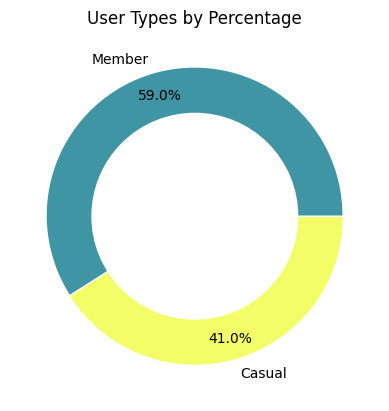

In [30]:
# The visualization will follow the order of the analysis steps, starting with a pie chart for user type percentages.
# For this static visualization, I chose to use matplotlib's .pie() method.
plt.pie(userType_percent, labels = ["Member", "Casual"], autopct = "%1.1f%%",
                             pctdistance = 0.85, colors = logo_colors, explode = [0.005, 0.005])
center_circle = plt.Circle((0, 0), 0.70, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("User Types by Percentage")
plt.show()

In [31]:
# Creating a visualization for rides per weekday. I chose to use plotly.express's line chart to create an interactive line chart.

total_rides_weekday = ex.line(rides_by_weekday, x = "weekday", y = "ride_id", color = "user_type", 
                              color_discrete_sequence = logo_colors, template = "plotly_dark", labels = 
                              {"ride_id":"Total Number of Rides", "weekday":"Day of Week", "user_type":
                               "User Type"}, title = "Total Number of Rides per Weekday by User Type",
                              hover_name = "user_type", hover_data = {"user_type":False}, markers = True)
total_rides_weekday.show()

In [32]:
# Creating a visualization for number of rides per day of month with the same plotly.express line chart.

total_rides_day = ex.line(rides_by_monthday, x = "month_day", y = "ride_id", color = "user_type",
                          color_discrete_sequence = logo_colors, template = "plotly_dark", labels = 
                          {"ride_id":"Total Number of Rides", "month_day":"Day of Month",
                           "user_type":"User Type"}, title = "Total Number of Rides by Day of Month",
                          hover_name = "user_type", hover_data = {"user_type":False}, markers = True)

total_rides_day.show()

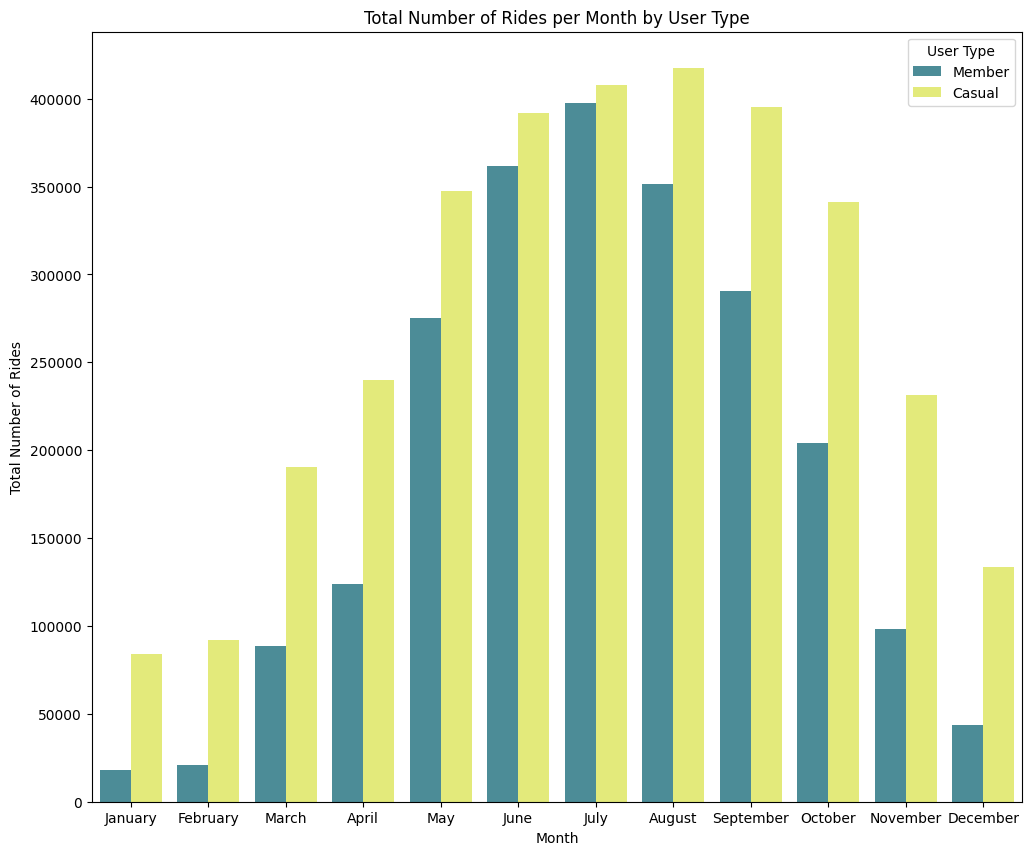

In [33]:
# Creating a visualization for total number of rides per month by usertype with the seaborn barplot method.

rides_per_month = plt.subplots(figsize = (12,10))
rides_per_month = sns.barplot(x = "month", y = "ride_id", data = rides_by_month, hue = "user_type",
                              palette = logo_colors, errorbar = None)
plt.legend(title = "User Type", loc = "upper right", labels = ["Member", "Casual"])
plt.xlabel("Month")
plt.ylabel("Total Number of Rides")
plt.title("Total Number of Rides per Month by User Type")
plt.show()

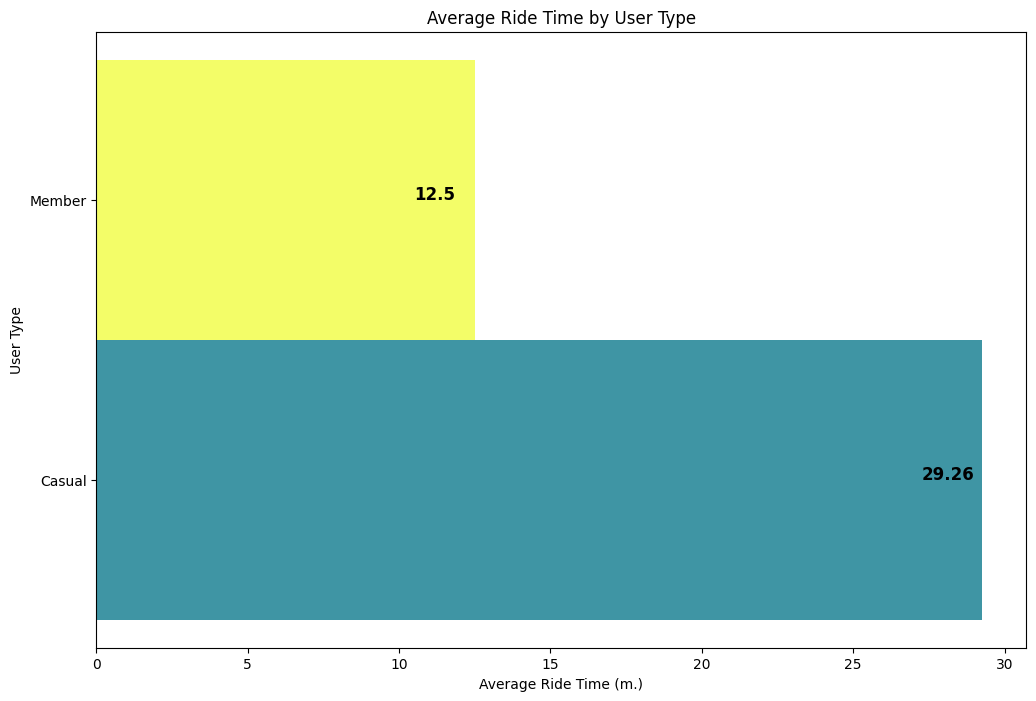

In [34]:
# Creating a visualization for the average ride time by usertype with the matplotlib horizontal barplot method.
# Setting the figure size for the barplot and a variable for the x-axis.
x = avgRide_per_usertype["ride_time"]
avgRide_per_user = plt.subplots(figsize = (12, 8))
avgRide_per_user = plt.barh(["Casual","Member"], x, color = logo_colors, height = (-1.0),
                                align = "center")
# Generating data labels by creating patches that read the width of each bar on the plot and displaying 
# that value (which matches the value from the avgRide_per_usertype dataframe).
for i in avgRide_per_user.patches:
    plt.text(i.get_width()-2.0, i.get_y()-0.5, str(round((i.get_width()), 2)),
             fontsize = 12, fontweight = "bold", color = "black")

plt.xlabel("Average Ride Time (m.)")
plt.ylabel("User Type")
plt.title("Average Ride Time by User Type")
plt.show()

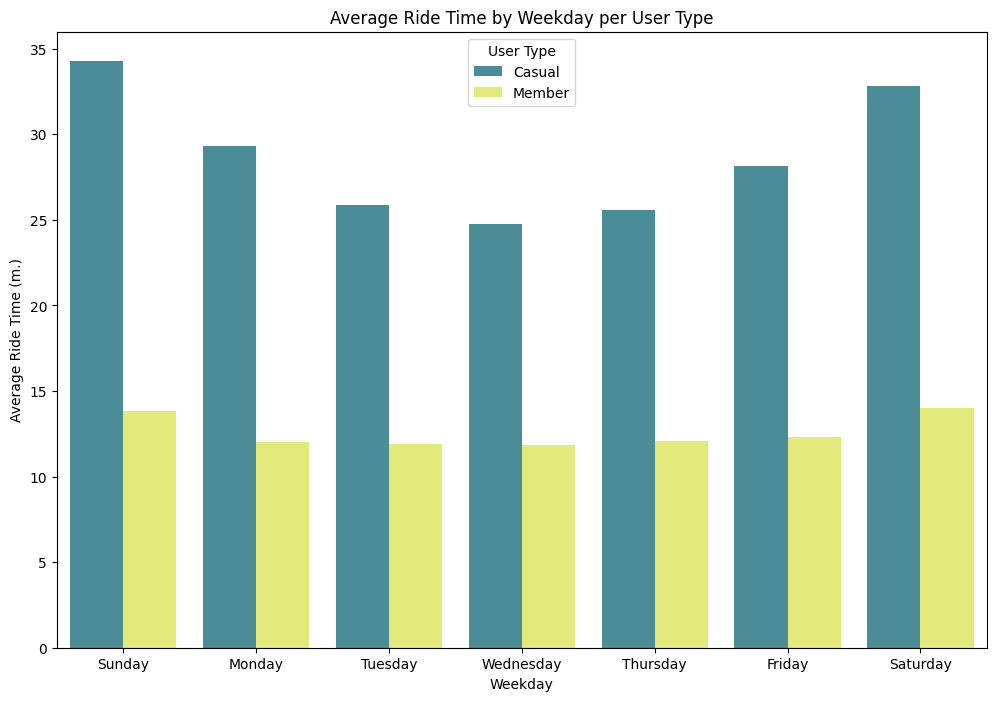

In [35]:
# Creating a visualization for the average ride time per weekday by usertype with the seaborn barplot method.

avgRide_per_wkday = plt.subplots(figsize = (12, 8))
avgRide_per_wkday = sns.barplot(x = "weekday", y = "ride_time", data = avgRide_per_weekday, hue = "user_type",
                                palette = logo_colors, errorbar = None)
#Creating custom legend that has a better looking format.
plt.legend(title = "User Type", loc = "upper center", labels = ["Casual", "Member"])
plt.xlabel("Weekday")
plt.ylabel("Average Ride Time (m.)")
plt.title("Average Ride Time by Weekday per User Type")
plt.show()

In [36]:
# Creating a visualization for the average ride time per day of the month by user type using the plotly express line chart method.

avgRide_per_dayofmonth = ex.line(avgRide_per_monthday, x = "month_day", y = "ride_time", color = "user_type",
                                 color_discrete_sequence = logo_colors, markers = True, title = "Average Ride Time per Day of Month by User Type",
                                 labels = {"month_day":"Day of Month", "ride_time":"Average Ride Time (m.)", "user_type":"User Type"},
                                 hover_name = "user_type", hover_data = {"user_type":False}, template = "plotly_dark")
avgRide_per_dayofmonth.show()

In [37]:
# Creating a visualization for the average ride time per month by usertype with the plotly express line chart method.

avgRide_by_month = ex.line(avgRide_per_month, x = "month", y = "ride_time", color = "user_type", color_discrete_sequence = 
                           logo_colors, markers = True, title = "Average Ride per Month by User Type", labels = 
                           {"ride_time":"Average Ride Time (m.)", "month":"Month", "user_type":"User Type"},
                           hover_name = "user_type", hover_data = {"user_type":False}, template = "plotly_dark")
avgRide_by_month.show()

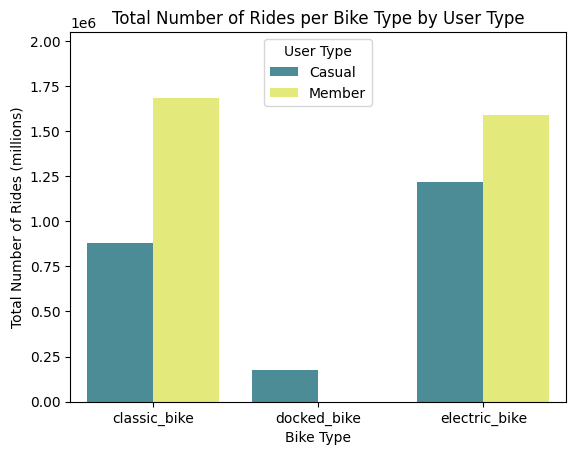

In [38]:
# Lastly, I will create a visualization for rides per bike type with the sebaorn barplot method.
rides_by_biketype = sns.barplot(x = "bike_type", y = "ride_id", data = avgRide_per_bike, hue = "user_type",
                                  palette = logo_colors, errorbar = None)
plt.legend(title = "User Type", loc = "upper center", labels = ["Casual", "Member"])
# Setting lower and upper limit of the y-axis.
rides_by_biketype.set_ylim(0, 2050000)
plt.xlabel("Bike Type")
plt.ylabel("Total Number of Rides (millions)")
plt.title("Total Number of Rides per Bike Type by User Type")
plt.show()

### __Guiding Questions__
    1. Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?
        - Through the analytical and visual analysis, I am able to answer the business task of this project. The data shows relationships that reflect the likely story being told by this dataset.
        
    2. What story does your data tell?
        - The story of this dataset references the ways that casual users and members of the bike-share program use it differently. To start, the data shows that there are a greater number of members in the bike-share program than casual riders. This shows that the program is doing a good job of getting users to become members of the program, but only compromises 59 percent of activity in the program. This number is good, but the company would likely want to see a larger margin between the members and casual users. Next, the majority of bike rides are taken by members, yet they average a much smaller average ride time than casual users. This gives an insight that most members of the bike-share program likely live within the city limits of Chicago, and likely use the bike-share program as a primary means of transportation within the city. On the side of the casual users, the data shows some similarity to my personal experiences with using a bike-share program in my home state. I have been a casual user for that program, and it is a service that allows to rent docked bikes throughout the city for a given amount of time, based on how much an individual is paying for the service. When I use the program, I make sure that I get the most value out of my money, and make sure to ride the bike as much as possible within the allotted time for riding. This is shown by the data, as casual members boast a far greater average ride time versus members. Casual users only have a limited time that they can ride the bikes, so they are likely wanting to spend as much time riding as possible. Also, the data shows that only casual users used the docked bikes, while members have a greater usage of the electric and classic bike types. Docked bikes are available at many access points across the city, and are not available for long-term rentals, and likely come at the lowest price. The greater usage of electric and classic bikes among members likely suggest that these come at no greater cost to the members of the program and are available for long-term rental. As these bike options are likely of no extra charge to members, it would make sense that members will use these bikes more frequently. On the other hand, casual users are likely visitors to the city and want a quick way to get around the city, so using the docked bikes is a perfect option.

    3. How do your findings relate to your original question?
        - These findings help show potential relationships in the varying uses of the bike-share program between casual users and members. With these findings, I am better able to provide data-driven insights into potential ways to recommend how the company can boost the number of users that become members of the bike-share program. The findings show that members are leading the overall usage of the bike-share program and, combined with the greater number of rides, show how the members use the program differently than casual users. This gives a data-driven insight into what type of audience would more likely be inclined to use the membership of the program.
    
    4. Who is your audience? What is the best way to communicate with them?
        - The audience for this analysis is Lily Moreno and the marketing department of the company. To communicate these findings with the marketing team, it would be best to schedule a meeting for the presentation of the findings that would include the key players in the development of programs to boost member percentages within the bike-share program
    
    5. Can data visualization help you share your findings?
        - The visualizations above follow the order of the analysis in the Analyze section. Each visualization is a chart that represents each data frame in the analyze step. The visualizations show the analysis at a quicker glance, and in an easier to read fashion. Each visualization helps paint the picture of what the data is showing and helps create a better understanding of the findings.
    
    6. Is your presentation accessible to your audience?
        - The PowerPoint presentation will be available through the Google Cloud and will be able to accessed by all stakeholders and members of the marketing team at any time. I have taken the liberty to mark the file as view only to ensure that the original presentation is not accidentally altered in any way.
    

# __Part 6:__ _Act_

### __Key Tasks__
    1. Create your portfolio.
    2. Add your case study.
    3. Practice presenting your case study to a friend or family member.

# __Recommendations__


 *  Create a special offer made to all residents within the Chicago area, such as a percentage off memberships, for becoming a member of the bike-share program. This could be boosted by providing scientific evidence that shows the benefits of using bikes over cars as a primary means of transportation within large cities.
 * Create an automated email to be sent to casual users after their "Xth" number of rides. When causal user is a recurring user of the bike-share program, they may not be aware of the benefits that a membership provides. This could be a great way to provide an "exclusive discount" for casual users to become a member of the program after a given number of rides.
 * Create a demographic survey to garner a better understanding of the reasonings as to why individuals who are members of the bike-share program became members of the service. This survey could include reasonings for choosing to become a member, what reasonings the user is using the bike share program for, where the user is from, and other demographical information that can provide more insight into the audience of the bike-share program.

### __Guiding Questions__
    1. What is your final conclusion based on your analysis?
        - This analysis provided four major insights into the data from the 2022 year of the Cyclistic bike-share program. First, there are more members than casual users of the program, fifty-nine percent in relation to forty-one percent. Next, members of the program had a greater number of rides per day of week, day of month, and month than casual users. In opposition, casual users had longer average ride times versus members per day of week, day of month, and month. Lastly, the data shows that members of the program used casual and electric bike types more than casual users, while casual users were the only ones to use the docked bike types. These insights helped me generate a theory as to suggest why these trends show in the data. First, members of the program having a greater number of rides and averaging a lower ride time versus casual users suggests that members of the bike-share program may be individuals that live within the Chicago area. In major cities across the United States, many individuals do not have the necessity for a car, but will still need a primary method of transport to get across their city. In this analysis, it is likely that the members of the bike-share program are people who live in Chicago and use this program to obtain an affordable primary means of transportation. This is further supported by the total number of rides per bike type. Members boast a much larger usage of classic and electric bikes versus users. This is likely due to these bike types having an upcharge for casual users, and are likely used for long-term rentals. Members, on the other hand, are likely able to rent these bikes at no upcharge, and are able to rent them for greater amounts of time. On the other hand, Casual users have a much greater average ride time, while have a lower number of total rides. This suggests that casual users are likely visitors to the city, and are needing a one-time method to be able to get across the Chicago area. As these users are on a pay-per-hour style of renting, they likely want to ensure that they spend most of their time riding the bike rental that they paid for. 
    
    2. How could your team and business apply your insights?
        - There are three methods of advancements that I am going to recommend to the audience. First, I would start by getting a better understanding of the members and casual users of the bikeshare program. This can be through an email or mail service survey that would include items such as: reasonings for choosing to become a member, what reasonings the user is using the bike share program for, where the user is from, and other demographical information that can provide more insight into the audience of the bike-share program. Next, I would recommend that a special offer be made to all residents within the Chicago area, such as a percentage off memberships, for becoming a member of the bike-share program. This could be boosted by providing scientific evidence that shows the benefits of using bikes over cars as a primary means of transportation within large cities. Providing a discount, plus reasonings as to why bikes are better for inner-city travel over cars could boost the amount of people that are willing to become members of the bike-share program. Lastly, members of the marketing team could create an automated email to be sent to casual users after their "Xth" number of rides. When causal user is a recurring user of the bike-share program, they may not be aware of the benefits that a membership provides. This could be a great way to provide an "exclusive discount" for casual users to become a member of the program after a given number of rides. 
    
    3. What next steps would you or your stakeholders take based on your findings?
        - For my team, we could take a look at datasets from years prior to 2022 and run an analysis to find the differences between each year. This could be used to back track with previous adjustments to boosting the number of members on the bike-share program to see which methods provided the largest increase in members within a year. These methods could be taken to the stakeholder to generate updates or modifications to previous programs to ensure that a greater number of users are likely to become members of the program.
    
    4. Is there additional data you could use to expand on your findings?
        - The findings of this analysis could be compared with other bike-share programs from major cities that have relative size and population numbers in comparison to Chicago. These datasets could show if other major cities are seeing similar trends, or if these cities are showing a larger percentage of users that become members of their bike-share programs.
    